# Library import

In [1]:
import os, cv2
import numpy as np
import pandas as pd
import random, tqdm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import albumentations as album

# Library install

In [2]:
!pip install segmentation_models_pytorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 97 kB 3.2 MB/s 
     |████████████████████████████████| 376 kB 24.5 MB/s 
     |████████████████████████████████| 58 kB 7.4 MB/s 
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16446 sha256=c0c42028aec8a198eff20700960a8cdf0767c21f39b8d4eab09b75202a2ca588
  Stored in directory: /root/.cache/pip/wheels/0e/cc/b2/49e74588263573ff778da58cc99b9c6349b496636a7e165be6
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60965 sha256=b0844642729bf754889489700876d46196db2764be104f0ad888ca1d7195d84c
  Stored in directory: /root/.cache/pip/wheels/ed/27/e8/9543d42de2740d3544db96aefef63bda3f2c1761b3334f4873
Successfully built efficientnet-pytorch pretrainedmodels


In [3]:
# !pip install -q -U segmentation-models-pytorch albumentations > /dev/null
import segmentation_models_pytorch as smp

# Data Loading

# Data Cleaning

## Save train/val/test dataset

In [ ]:
# img_mask_zip = list(zip(common_img,common_mask))

# import random

# val_test = random.sample(img_mask_zip,20)
# val = val_test[:10]
# test = val_test[10:]

# print(val[0])
# print(test[0])

('/content/All/KakaoTalk_20220527_112702026_27.jpg', '/content/All/KakaoTalk_20220527_112702026_27_mask.tif')
('/content/All/KakaoTalk_20220623_171648386_20.jpg', '/content/All/KakaoTalk_20220623_171648386_20_mask.tif')


In [ ]:
# print(os.listdir('/content/All')[0])
# len(os.listdir('/content/All'))

KakaoTalk_20220622_142112622_17_mask.tif


6300

In [ ]:
# val_img = [i[0] for i in val]
# val_mask = [i[1] for i in val]
# test_img = [i[0] for i in test]
# test_mask = [i[1] for i in test]

# # val image 파일 이동
# if os.path.exists('/content/val'):
#   shutil.rmtree('/content/val')
#   os.mkdir('/content/val')
#   os.mkdir('/content/val/img')
#   os.mkdir('/content/val/mask')
#   for path in val_img:
#     shutil.move(path,'/content/val/img')
#   for path in val_mask:  
#     shutil.move(path,'/content/val/mask')
# else:
#   os.mkdir('/content/val')
#   os.mkdir('/content/val/img')
#   os.mkdir('/content/val/mask')
#   for path in val_img:
#     shutil.move(path,'/content/val/img')
#   for path in val_mask:  
#     shutil.move(path,'/content/val/mask')

# # test image 파일 이동
# if os.path.exists('/content/test'):
#   shutil.rmtree('/content/test')
#   os.mkdir('/content/test')
#   os.mkdir('/content/test/img')
#   os.mkdir('/content/test/mask')

#   for path in test_img:
#     shutil.move(path,'/content/test/img')
#   for path in test_mask:  
#     shutil.move(path,'/content/test/mask')
# else:
#   os.mkdir('/content/test')
#   os.mkdir('/content/test/img')
#   os.mkdir('/content/test/mask')

#   for path in test_img:
#     shutil.move(path,'/content/test/img')
#   for path in test_mask:  
#     shutil.move(path,'/content/test/mask')

In [ ]:
# len(os.listdir('/content/All'))

6260

In [ ]:
# # 나머지 image 파일들 train 

# train_img = [path for path in common_img if path not in test_img and path not in val_img]
# train_mask = [path for path in common_mask if path not in test_mask and path not in val_mask]

# if os.path.exists('/content/train'):
#   shutil.rmtree('/content/train')
#   os.mkdir('/content/train')
#   os.mkdir('/content/train/img')
#   os.mkdir('/content/train/mask')

# else:
#   os.mkdir('/content/train')
#   os.mkdir('/content/train/img')
#   os.mkdir('/content/train/mask')

# for path in train_img:
#   shutil.move(path,'/content/train/img')
# for path in train_mask:  
#   shutil.move(path,'/content/train/mask')

# print('train_img',len(os.listdir('/content/train/img')))
# print('train_mask',len(os.listdir('/content/train/mask')))
# print('val_img',len(os.listdir('/content/val/img')))
# print('val_mask',len(os.listdir('/content/val/mask')))
# print('test_img',len(os.listdir('/content/test/img')))
# print('test_mask',len(os.listdir('/content/test/mask')))

train_img 3119
train_mask 3119
val_img 10
val_mask 10
test_img 10
test_mask 10


In [4]:
!unzip /content/drive/MyDrive/cp2/traindata_scratch.zip
!unzip /content/drive/MyDrive/cp2/traindata_scratch2.zip
!unzip /content/drive/MyDrive/cp2/traindata_scratch_1000_1200.zip
# !unzip /content/drive/MyDrive/cp2/traindata_scratch_1200_1400.zip
# !unzip /content/drive/MyDrive/cp2/traindata_scratch_14_16.zip
# !unzip /content/drive/MyDrive/cp2/traindata_scratch_16_18.zip
# !unzip /content/drive/MyDrive/cp2/traindata_scratch_18_20.zip
# !unzip /content/drive/MyDrive/cp2/traindata_scratch_20_22.zip
# !unzip /content/drive/MyDrive/cp2/traindata_scratch_22_24.zip
# !unzip /content/drive/MyDrive/cp2/traindata_scratch_24_26.zip
# !unzip /content/drive/MyDrive/cp2/traindata_scratch_26_28.zip
# !unzip /content/drive/MyDrive/cp2/traindata_scratch_28_30.zip
# !unzip /content/drive/MyDrive/cp2/traindata_scratch_30_.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: patched_mask/KakaoTalk_20220518_143409236_07_mask_108.tif  
  inflating: patched_mask/KakaoTalk_20220518_143409236_07_mask_109.tif  
  inflating: patched_mask/KakaoTalk_20220518_143409236_07_mask_11.tif  
  inflating: patched_mask/KakaoTalk_20220518_143409236_07_mask_110.tif  
  inflating: patched_mask/KakaoTalk_20220518_143409236_07_mask_111.tif  
  inflating: patched_mask/KakaoTalk_20220518_143409236_07_mask_1110.tif  
  inflating: patched_mask/KakaoTalk_20220518_143409236_07_mask_112.tif  
  inflating: patched_mask/KakaoTalk_20220518_143409236_07_mask_113.tif  
  inflating: patched_mask/KakaoTalk_20220518_143409236_07_mask_114.tif  
  inflating: patched_mask/KakaoTalk_20220518_143409236_07_mask_115.tif  
  inflating: patched_mask/KakaoTalk_20220518_143409236_07_mask_116.tif  
  inflating: patched_mask/KakaoTalk_20220518_143409236_07_mask_117.tif  
  inflating: patched_mask/KakaoTalk_20220518_143409236_07_mask_118.tif  
  inflating: pa

In [5]:
# 데이터 구조 파악
# input : images path list
# process : 
  # 1) image/mask_dataset.append -> np.array => reference code follow ()
      # patching 하는 부분 빼고 나머지 코드 가져와야함
  # 2) write folder path directly => final UNet code follow (OneHotEncoding)
# output : np.array 로 전환하면 dataset.shape = (500,256,256,3) 예상
img1_path = '/content/patched_img'
mask1_path = '/content/patched_mask'

img1 = os.listdir(img1_path)
mask1 = os.listdir(mask1_path)

print(len(img1))
print(len(mask1))

img_dir = [img1_path + '/' + img_name for img_name in img1]
mask_dir = [mask1_path + '/' + mask_name for mask_name in mask1]

68328
68332


In [6]:
img = sorted(img_dir)
mask = sorted(mask_dir)

In [7]:
mask[:2]

['/content/patched_mask/0afd406c-fdb7-499a-9914-d17c5a8762bd_mask_00.tif',
 '/content/patched_mask/0afd406c-fdb7-499a-9914-d17c5a8762bd_mask_01.tif']

In [8]:
# 파일 이름만 변수 할당

img_name = [path.split('/')[-1] for path in img]
img_name = [name.split('.')[0] for name in img_name]

mask_name = [path.split('/')[-1] for path in mask]
mask_name = [name.split('.')[0] for name in mask_name]
mask_name = [name.replace('_mask','') for name in mask_name]

In [9]:
mask_name[:2]

['0afd406c-fdb7-499a-9914-d17c5a8762bd_00',
 '0afd406c-fdb7-499a-9914-d17c5a8762bd_01']

## 중복 데이터 제거

In [10]:
# 파일 이름 수 세기

from collections import Counter

# img_name = [name.split('.')[0] for name in img_name]
counter = Counter(img_name)

img_dict = sorted(counter.items(), key = lambda item : item[1],reverse = True)
img_dict[:5]

[('0afd406c-fdb7-499a-9914-d17c5a8762bd_00', 1),
 ('0afd406c-fdb7-499a-9914-d17c5a8762bd_01', 1),
 ('0afd406c-fdb7-499a-9914-d17c5a8762bd_02', 1),
 ('0afd406c-fdb7-499a-9914-d17c5a8762bd_03', 1),
 ('0afd406c-fdb7-499a-9914-d17c5a8762bd_04', 1)]

In [11]:
# 파일 이름 수 세기

from collections import Counter

# img_name = [name.split('.')[0] for name in img_name]
counter = Counter(mask_name)

mask_dict = sorted(counter.items(), key = lambda item : item[1],reverse = True)
mask_dict[:5]

[('0afd406c-fdb7-499a-9914-d17c5a8762bd_00', 1),
 ('0afd406c-fdb7-499a-9914-d17c5a8762bd_01', 1),
 ('0afd406c-fdb7-499a-9914-d17c5a8762bd_02', 1),
 ('0afd406c-fdb7-499a-9914-d17c5a8762bd_03', 1),
 ('0afd406c-fdb7-499a-9914-d17c5a8762bd_04', 1)]

## 서로 대응되지 않는 image/mask set 제거

In [12]:
Over_img_name = list(set(img_name)-set(mask_name))
Over_mask_name = list(set(mask_name)-set(img_name))

Over_img_index = [img_name.index(i) for i in Over_img_name]
Over_mask_index = [mask_name.index(i) for i in Over_mask_name]

print(Over_img_index)
print(Over_mask_index)

[]
[27939, 27941, 27937, 27940]


In [13]:
img = [img[i] for i,x in enumerate(img) if i not in Over_img_index]
mask = [mask[i] for i,x in enumerate(mask) if i not in Over_mask_index]

In [14]:
print(len(img),len(mask))

68328 68328


In [15]:
# label data formating 
  # 1) 118 tutorial 
  # 2) 기존 UNet OneHotEncode format 사용

In [16]:
# RGB image 처리 -> reference 참고

## Save train/test dataset

In [17]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(img,mask,test_size=0.2,random_state=2)

In [18]:
print(len(X_train),len(y_train),len(X_test),len(y_test))

54662 54662 13666 13666


In [19]:
import shutil

if not os.path.exists('/content/test_img'):
  os.mkdir('/content/test_img')
  for X_path in X_test:
    shutil.move(X_path,'/content/test_img')

if not os.path.exists('/content/test_mask'):
  os.mkdir('/content/test_mask')
  for y_path in y_test:
    shutil.move(y_path,'/content/test_mask')

In [20]:
print(len(os.listdir('/content/patched_img')),len(os.listdir('/content/patched_mask')),len(os.listdir('/content/test_img')),len(os.listdir('/content/test_mask')))

54662 54666 13666 13666


# Visulization

ValueError: ignored

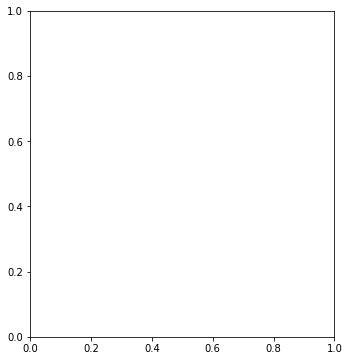

In [20]:
import random 

patch_size = 256

image_number = random.randint(0, len(X_train))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(np.reshape(X_train[image_number], (patch_size, patch_size, 3)))
plt.subplot(122)
plt.imshow(np.reshape(X_train[image_number], (patch_size, patch_size, 3)))
plt.show()

# Start modeling

In [21]:
# 데이터셋 경로 설정

DATA_DIR_train_img = '/content/patched_img'
DATA_DIR_train_mask = '/content/patched_mask'
# DATA_DIR_val_img = '/content/val/img'
# DATA_DIR_val_mask = '/content/val/mask'
DATA_DIR_test_img = '/content/test_img'
DATA_DIR_test_mask = '/content/test_mask'

class_dict = pd.DataFrame({'name': ['background','scratch'],'r':[0,255],'g':[0,255],'b':[0,255]},columns=['r','g','b'],index=['background','scratch'])


# Defining train / val / test directories

In [22]:
# # 데이터셋 경로 설정

# DATA_DIR_train_img = '/content/train/img'
# DATA_DIR_train_mask = '/content/train/mask'
# DATA_DIR_val_img = '/content/val/img'
# DATA_DIR_val_mask = '/content/val/mask'
# DATA_DIR_test_img = '/content/test/img'
# DATA_DIR_test_mask = '/content/test/mask'

# class_dict = pd.DataFrame({'name': ['background','scratch'],'r':[0,255],'g':[0,255],'b':[0,255]},columns=['r','g','b'],index=['background','scratch'])


In [23]:
# 모든 class 이름
class_names = class_dict.index.tolist() # 여러가지 손상 데이터 적용 가능
# RGB 값 
class_rgb_values = class_dict[['r','g','b']].values.tolist()

print('All dataset classes and their corresponding RGB values in labels:')
print('Class Names: ', class_names)
print('Class RGB values: ', class_rgb_values)

All dataset classes and their corresponding RGB values in labels:
Class Names:  ['background', 'scratch']
Class RGB values:  [[0, 0, 0], [255, 255, 255]]


# Getting specific classes to segment

In [24]:
# 데이터 셋에서 Segemntation을 수행할 class만 선택 
select_classes = ['background', 'scratch'] # 원하는 label 선택

# 선택한 class 의 RGB 값
select_class_indices = [class_names.index(cls.lower()) for cls in select_classes]
select_class_rgb_values =  np.array(class_rgb_values)[select_class_indices]

print('Selected classes and their corresponding RGB values in labels:')
print('Class Names: ', class_names)
print('Class RGB values: ', class_rgb_values)

Selected classes and their corresponding RGB values in labels:
Class Names:  ['background', 'scratch']
Class RGB values:  [[0, 0, 0], [255, 255, 255]]


# Helper functions for viz. & one-hot encoding/decoding

In [25]:
# helper function for data visualization
def visualize(**images):
    """
    Plot images in one row
    """
    n_images = len(images)
    plt.figure(figsize=(20,8))
    for idx, (name, image) in enumerate(images.items()):
        plt.subplot(1, n_images, idx + 1)
        plt.xticks([]); 
        plt.yticks([])
        # get title from the parameter names
        plt.title(name.replace('_',' ').title(), fontsize=20)
        plt.imshow(image)
    plt.show()

# Perform one hot encoding on label
def one_hot_encode(label, label_values):
    """
    Convert a segmentation image label array to one-hot format
    by replacing each pixel value with a vector of length num_classes
    # Arguments
        label: The 2D array segmentation image label
        label_values
        
    # Returns
        A 2D array with the same width and hieght as the input, but
        with a depth size of num_classes
    """
    semantic_map = []
    for colour in label_values:
        equality = np.equal(label, colour)
        class_map = np.all(equality, axis = -1)
        semantic_map.append(class_map)
    semantic_map = np.stack(semantic_map, axis=-1)

    return semantic_map
    
# Perform reverse one-hot-encoding on labels / preds
def reverse_one_hot(image):
    """
    Transform a 2D array in one-hot format (depth is num_classes),
    to a 2D array with only 1 channel, where each pixel value is
    the classified class key.
    # Arguments
        image: The one-hot format image 
        
    # Returns
        A 2D array with the same width and hieght as the input, but
        with a depth size of 1, where each pixel value is the classified 
        class key.
    """
    x = np.argmax(image, axis = -1)
    return x

# Perform colour coding on the reverse-one-hot outputs
def colour_code_segmentation(image, label_values):
    """
    Given a 1-channel array of class keys, colour code the segmentation results.
    # Arguments
        image: single channel array where each value represents the class key.
        label_values

    # Returns
        Colour coded image for segmentation visualization
    """
    colour_codes = np.array(label_values)
    x = colour_codes[image.astype(int)]

    return x

In [26]:
class BuildingsDataset(torch.utils.data.Dataset):

    """Massachusetts Buildings Dataset. Read images, apply augmentation and preprocessing transformations.
    
    Args:
        images_dir (str): path to images folder
        masks_dir (str): path to segmentation masks folder
        class_rgb_values (list): RGB values of select classes to extract from segmentation mask
        augmentation (albumentations.Compose): data transfromation pipeline 
            (e.g. flip, scale, etc.)
        preprocessing (albumentations.Compose): data preprocessing 
            (e.g. noralization, shape manipulation, etc.)
    
    """
    
    def __init__(
            self, 
            images_dir, 
            masks_dir, 
            class_rgb_values=None, 
            augmentation=None, 
            preprocessing=None,
    ):
        
        self.image_paths = [os.path.join(images_dir, image_id) for image_id in sorted(os.listdir(images_dir))]
        self.mask_paths = [os.path.join(masks_dir, image_id) for image_id in sorted(os.listdir(masks_dir))]

        self.class_rgb_values = class_rgb_values
        self.augmentation = augmentation
        self.preprocessing = preprocessing
    
    def __getitem__(self, i):
        
        # read images and masks
        image = cv2.cvtColor(cv2.imread(self.image_paths[i]), cv2.COLOR_BGR2RGB)
        mask = cv2.cvtColor(cv2.imread(self.mask_paths[i]), cv2.COLOR_BGR2RGB)
        
        # one-hot-encode the mask
        mask = one_hot_encode(mask, self.class_rgb_values).astype('float')
        
        # apply augmentations
        if self.augmentation:
            sample = self.augmentation(image=image, mask=mask)
            image, mask = sample['image'], sample['mask']
        
        # apply preprocessing
        if self.preprocessing:
            sample = self.preprocessing(image=image, mask=mask)
            image, mask = sample['image'], sample['mask']
            
        return image, mask
        
    def __len__(self):
        # return length of 
        return len(self.image_paths)

# Visualize Sample Image and Mask

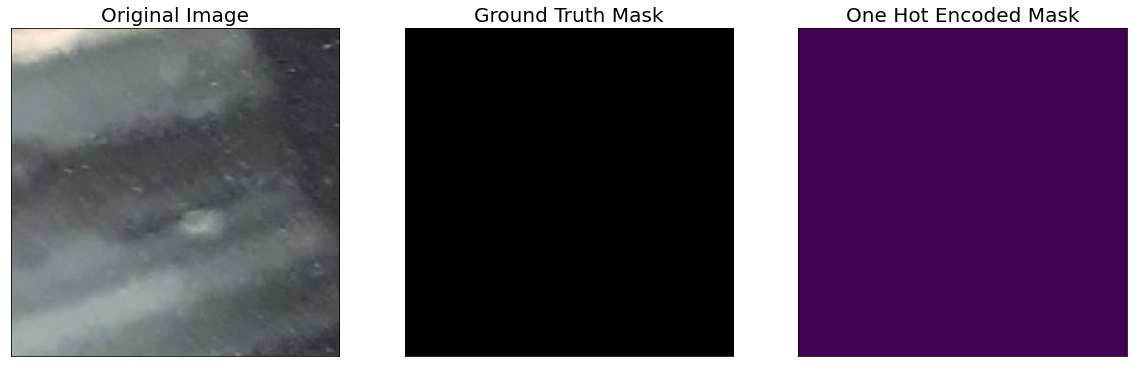

In [27]:
dataset = BuildingsDataset(DATA_DIR_train_img, DATA_DIR_train_mask, class_rgb_values=select_class_rgb_values)
random_idx = random.randint(0, len(dataset)-1)
image, mask = dataset[7]

visualize(
    original_image = image,
    ground_truth_mask = colour_code_segmentation(reverse_one_hot(mask), select_class_rgb_values),
    one_hot_encoded_mask = reverse_one_hot(mask)
)

# Defining Augmentations

In [28]:
from albumentations.augmentations.geometric.resize import LongestMaxSize
def get_training_augmentation():
    train_transform = [    
        # album.RandomCrop(height=256, width=256, always_apply=True),
        album.LongestMaxSize(max_size = (256,256)),
        album.OneOf(
            [
                album.HorizontalFlip(p=1),
                album.VerticalFlip(p=1),
                album.RandomRotate90(p=1),
            ],
            p=0.75,
        ),
    ]
    return album.Compose(train_transform)


def get_validation_augmentation():   
    # Add sufficient padding to ensure image is divisible by 32
    test_transform = [
        album.PadIfNeeded(min_height=1536, min_width=1536, always_apply=True, border_mode=0),
    ]
    return album.Compose(test_transform)


def to_tensor(x, **kwargs):
    return x.transpose(2, 0, 1).astype('float32')


def get_preprocessing(preprocessing_fn=None):
    """Construct preprocessing transform    
    Args:
        preprocessing_fn (callable): data normalization function 
            (can be specific for each pretrained neural network)
    Return:
        transform: albumentations.Compose
    """   
    _transform = []
    if preprocessing_fn:
        _transform.append(album.Lambda(image=preprocessing_fn))
    _transform.append(album.Lambda(image=to_tensor, mask=to_tensor))
        
    return album.Compose(_transform)

# Visualize Augmented Images & Masks

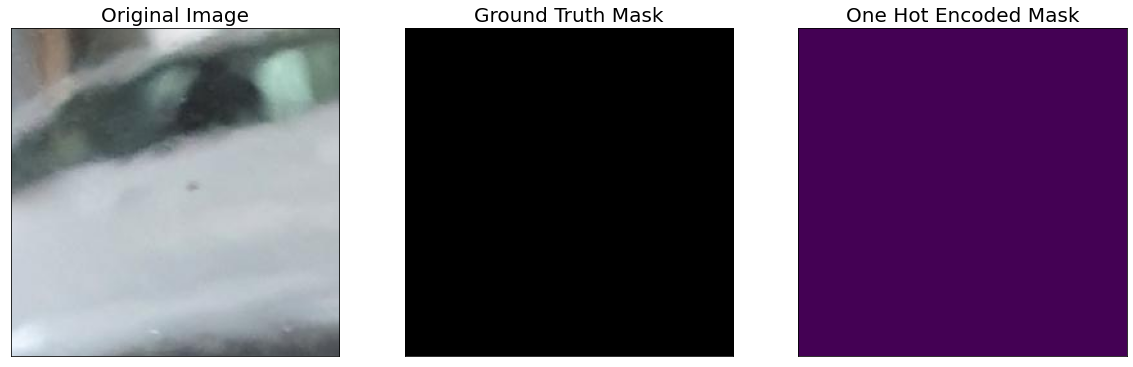

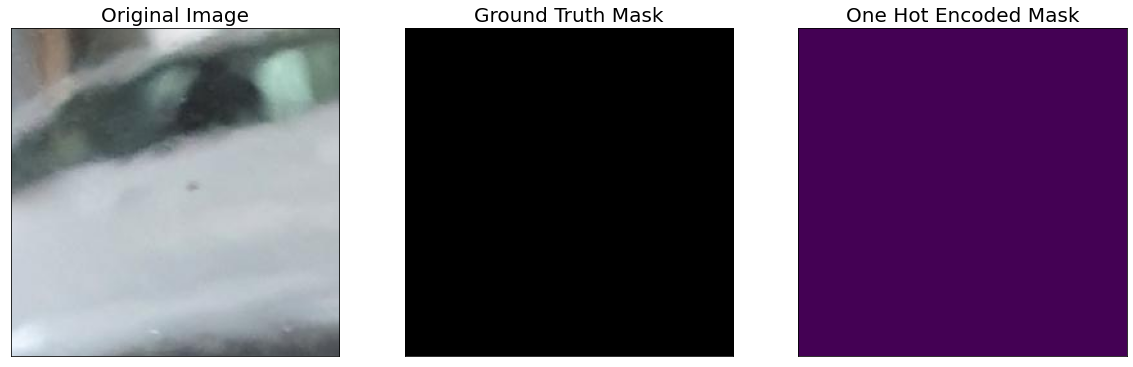

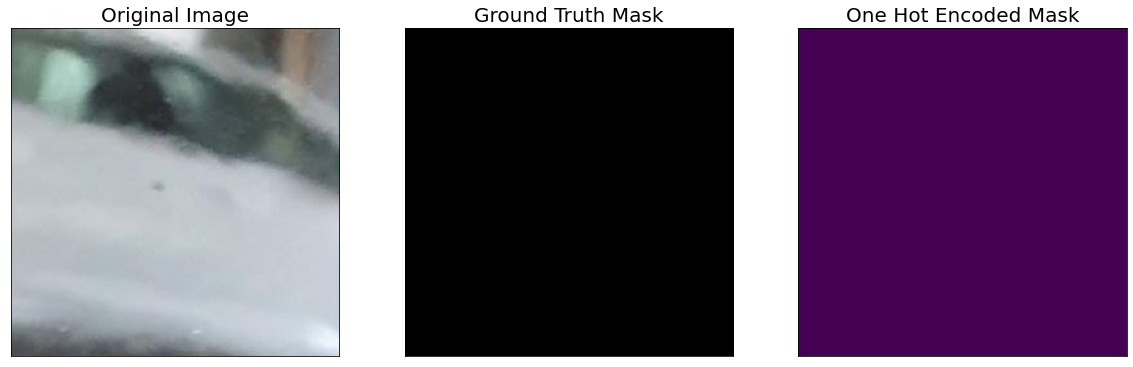

In [29]:
augmented_dataset = BuildingsDataset(
    DATA_DIR_train_img, DATA_DIR_train_mask, 
    augmentation=get_training_augmentation(),
    class_rgb_values=select_class_rgb_values,
)

random_idx = random.randint(0, len(augmented_dataset)-1)

# Different augmentations on a random image/mask pair (256*256 crop)
for i in range(3):
    # image, mask = augmented_dataset[random_idx]
    image, mask = augmented_dataset[1]
    visualize(
        original_image = image,
        ground_truth_mask = colour_code_segmentation(reverse_one_hot(mask), select_class_rgb_values),
        one_hot_encoded_mask = reverse_one_hot(mask)
    )

In [ ]:
print('randomcrop:',image.shape)
print('randomcrop:',mask.shape)

randomcrop: (256, 256, 3)
randomcrop: (256, 256, 2)


In [ ]:
print(image.shape)
print(mask.shape)

(1440, 1080, 3)
(1440, 1080, 2)


In [ ]:
print("longestmaxsize :",image.shape)
print("longestmaxsize :",mask.shape)

longestmaxsize : (256, 256, 3)
longestmaxsize : (256, 256, 2)


# Training DeepLabV3+ with Pretrained ResNet101 Encoder
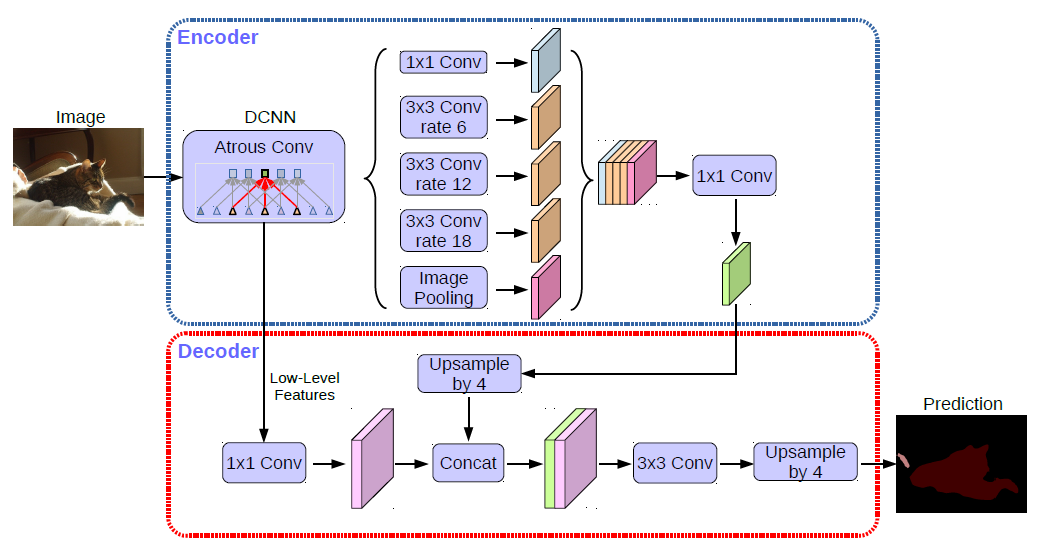

# Model definition

In [30]:
ENCODER = 'resnet101'
ENCODER_WEIGHTS = 'imagenet'
CLASSES = class_names
ACTIVATION = 'sigmoid' # could be None for logits or 'softmax2d' for multiclass segmentation

# create segmentation model with pretrained encoder
model = smp.DeepLabV3Plus(
    encoder_name=ENCODER, 
    encoder_weights=ENCODER_WEIGHTS, 
    classes=len(CLASSES), 
    activation=ACTIVATION,
)

preprocessing_fn = smp.encoders.get_preprocessing_fn(ENCODER, ENCODER_WEIGHTS)

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/hub/checkpoints/resnet101-5d3b4d8f.pth


  0%|          | 0.00/170M [00:00<?, ?B/s]

# Train/ Val DataLoader

In [31]:
!pip install -U git+https://github.com/albu/albumentations --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-elv1kuwy
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-elv1kuwy


In [32]:
# Get train and val dataset instances
train_dataset = BuildingsDataset(
    DATA_DIR_train_img, DATA_DIR_train_mask, 
    augmentation=False,
    preprocessing=get_preprocessing(preprocessing_fn),
    class_rgb_values=select_class_rgb_values,
)

valid_dataset = BuildingsDataset(
    DATA_DIR_test_img, DATA_DIR_test_mask, 
    augmentation=False, 
    preprocessing=get_preprocessing(preprocessing_fn),
    class_rgb_values=select_class_rgb_values,
)

# Get train and val data loaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=4) #5
valid_loader = DataLoader(valid_dataset, batch_size=1, shuffle=False, num_workers=2)

# Set Hyperparams

In [ ]:
# !pip install --upgrade git+https://github.com/qubvel/segmentation_models.pytorch

In [33]:
from segmentation_models_pytorch.utils import losses
# Set flag to train the model or not. If set to 'False', only prediction is performed (using an older model checkpoint)
TRAINING = True

# Set num of epochs
EPOCHS = 5  # 80

# Set device: `cuda` or `cpu`
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# define loss function
loss = smp.utils.losses.DiceLoss()

# define metrics
metrics = [
    smp.utils.metrics.IoU(threshold=0.5),
]

# define optimizer
optimizer = torch.optim.Adam([ 
    dict(params=model.parameters(), lr=0.0001),
])

# define learning rate scheduler (not used in this NB)
lr_scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(
    optimizer, T_0=1, T_mult=2, eta_min=5e-5,
)

# load best saved model checkpoint from previous commit (if present)
# if os.path.exists('/content/drive/MyDrive/cp2/Deeplab_best_model/best_model.pth'):
#     model = torch.load('/content/drive/MyDrive/cp2/Deeplab_best_model/best_model.pth', map_location=DEVICE)

In [34]:
train_epoch = smp.utils.train.TrainEpoch(
    model, 
    loss=loss, 
    metrics=metrics, 
    optimizer=optimizer,
    device=DEVICE,
    verbose=True,
)

valid_epoch = smp.utils.train.ValidEpoch(
    model, 
    loss=loss, 
    metrics=metrics, 
    device=DEVICE,
    verbose=True,
)

# Training DeepLabV3+

In [35]:
# Cuda out of memory 문제 해결

import gc
gc.collect()
torch.cuda.empty_cache()

In [36]:
%%time

if TRAINING:

    best_iou_score = 0.0
    train_logs_list, valid_logs_list = [], []

    for i in range(0, EPOCHS):

        # Perform training & validation
        print('\nEpoch: {}'.format(i))
        train_logs = train_epoch.run(train_loader)
        valid_logs = valid_epoch.run(valid_loader)
        train_logs_list.append(train_logs)
        valid_logs_list.append(valid_logs)

        # Save model if a better val IoU score is obtained
        if best_iou_score < valid_logs['iou_score']:
            best_iou_score = valid_logs['iou_score']
            torch.save(model, './best_model_all.pth')
            print('Model saved!')


Epoch: 0
valid: 100%|██████████| 13666/13666 [06:54<00:00, 32.99it/s, dice_loss - 0.0105, iou_score - 0.9853]
Model saved!

Epoch: 1
train:  14%|█▎        | 462/3417 [03:48<24:23,  2.02it/s, dice_loss - 0.00897, iou_score - 0.9832]


KeyboardInterrupt: ignored

# Prediction on Test Data ( best_model 이름 바꿔가며 실행하기 !!!)

In [37]:
# load best saved model checkpoint from the current run
if os.path.exists('./best_model_all.pth'):
    best_model = torch.load('./best_model_all.pth', map_location=DEVICE)
    print('Loaded DeepLabV3+ model from this run.')

# load best saved model checkpoint from previous commit (if present)
elif os.path.exists('/content/drive/MyDrive/cp2/Deeplab_best_model/best_model.pth'):
    best_model = torch.load('/content/drive/MyDrive/cp2/Deeplab_best_model/best_model.pth', map_location=DEVICE)
    print('Loaded UNet model from a previous commit.')

Loaded DeepLabV3+ model from this run.


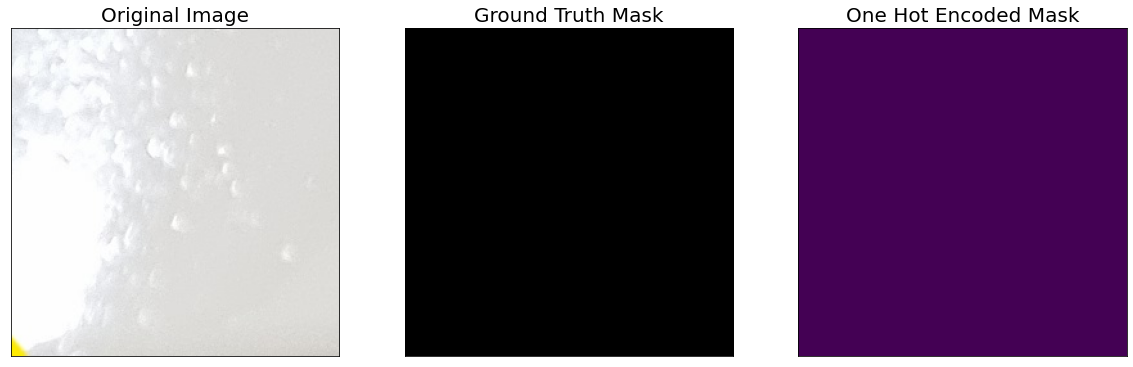

In [38]:
# create test dataloader (with preprocessing operation: to_tensor(...))
test_dataset = BuildingsDataset(
    DATA_DIR_test_img, 
    DATA_DIR_test_mask, 
    augmentation=False, 
    preprocessing=get_preprocessing(preprocessing_fn),
    class_rgb_values=select_class_rgb_values,
)

test_dataloader = DataLoader(test_dataset)

# test dataset for visualization (without preprocessing transformations)
test_dataset_vis = BuildingsDataset(
    DATA_DIR_test_img, DATA_DIR_test_mask, 
    augmentation=False,
    class_rgb_values=select_class_rgb_values,
)

# get a random test image/mask index
random_idx = random.randint(0, len(test_dataset_vis)-1)
image, mask = test_dataset_vis[random_idx]

visualize(
    original_image = image,
    ground_truth_mask = colour_code_segmentation(reverse_one_hot(mask), select_class_rgb_values),
    one_hot_encoded_mask = reverse_one_hot(mask)
)

In [39]:
# Center crop padded image / mask to original image dims
def crop_image(image, target_image_dims=[1500,1500,3]):
   
    target_size = target_image_dims[0]
    image_size = len(image)
    padding = (image_size - target_size) // 2

    return image[
        padding:image_size - padding,
        padding:image_size - padding,
        :,
    ]

In [40]:
sample_preds_folder = '/content/sample_predictions/'
if not os.path.exists(sample_preds_folder):
    os.makedirs(sample_preds_folder)

(256, 256, 3)
torch.Size([1, 3, 256, 256])


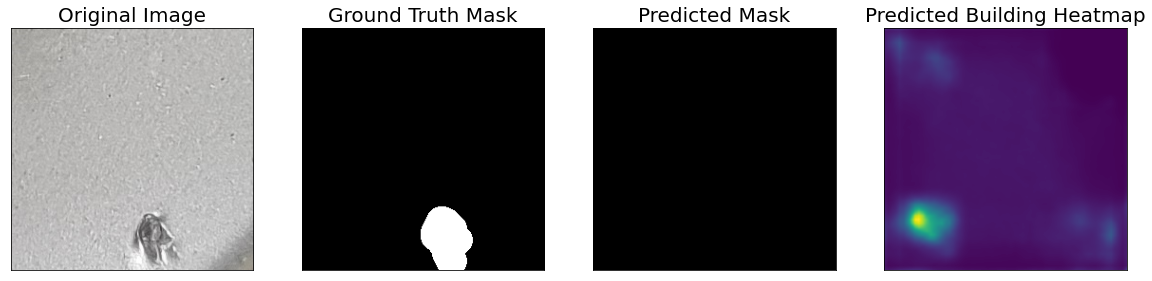

(256, 256, 3)
torch.Size([1, 3, 256, 256])


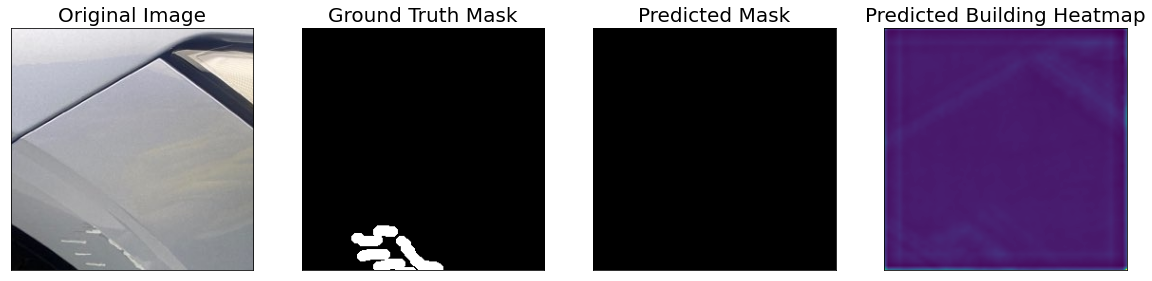

(256, 256, 3)
torch.Size([1, 3, 256, 256])


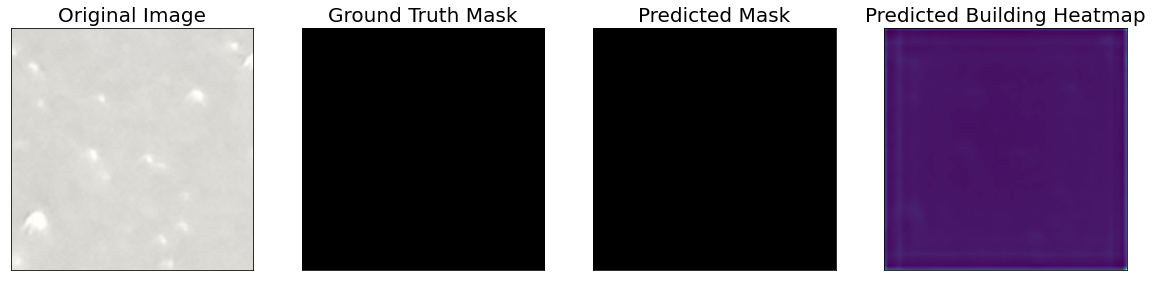

(256, 256, 3)
torch.Size([1, 3, 256, 256])


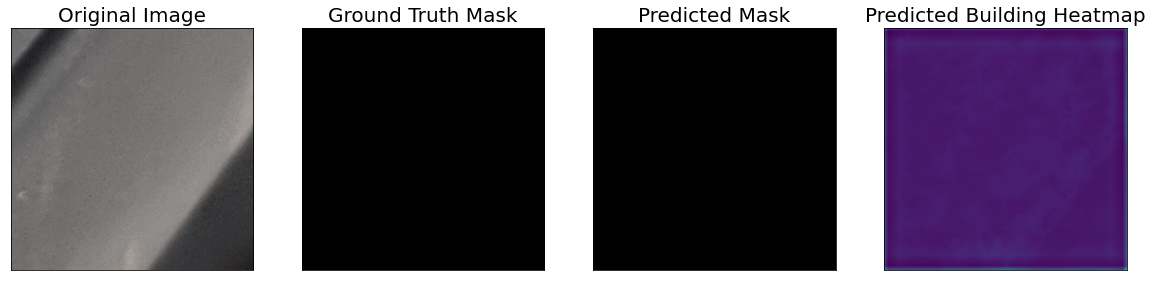

(256, 256, 3)
torch.Size([1, 3, 256, 256])


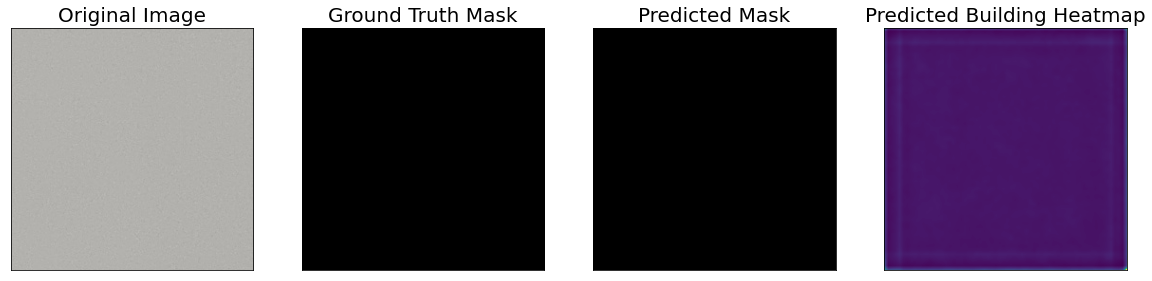

In [49]:
# for idx in range(len(test_dataset)):
for idx in range(5):
    random_idx = random.randint(0, len(test_dataset)-1)
    image, gt_mask = test_dataset[random_idx]
    
    image_vis = test_dataset_vis[random_idx][0]
    print(image_vis.shape)
    x_tensor = torch.from_numpy(image).to(DEVICE).unsqueeze(0)
    print(x_tensor.shape)
    # Predict test image
    pred_mask = best_model(x_tensor)
    pred_mask = pred_mask.detach().squeeze().cpu().numpy()
    # Convert pred_mask from `CHW` format to `HWC` format
    pred_mask = np.transpose(pred_mask,(1,2,0))
    # Get prediction channel corresponding to scratch
    pred_building_heatmap = pred_mask[:,:,select_classes.index('scratch')]
    pred_mask = crop_image(colour_code_segmentation(reverse_one_hot(pred_mask), select_class_rgb_values))
    # Convert gt_mask from `CHW` format to `HWC` format
    gt_mask = np.transpose(gt_mask,(1,2,0))
    gt_mask = crop_image(colour_code_segmentation(reverse_one_hot(gt_mask), select_class_rgb_values))
    cv2.imwrite(os.path.join(sample_preds_folder, f"sample_pred_{idx}.png"), np.hstack([image_vis, gt_mask, pred_mask])[:,:,::-1])
    
    visualize(
        original_image = image_vis,
        ground_truth_mask = gt_mask,
        predicted_mask = pred_mask,
        predicted_building_heatmap = pred_building_heatmap
    )

# Model Evaluation on Test Dataset

In [ ]:
test_epoch = smp.utils.train.ValidEpoch(
    model,
    loss=loss, 
    metrics=metrics, 
    device=DEVICE,
    verbose=True,
)

valid_logs = test_epoch.run(test_dataloader)
print("Evaluation on Test Data: ")
print(f"Mean IoU Score: {valid_logs['iou_score']:.4f}")
print(f"Mean Dice Loss: {valid_logs['dice_loss']:.4f}")

# Plot Dice Loss & IoU Metric for Train vs. Val

In [51]:
train_logs_df = pd.DataFrame(train_logs_list)
valid_logs_df = pd.DataFrame(valid_logs_list)
train_logs_df.T

,0,1,2,3
dice_loss,0.073881,0.015172,0.012594,0.011938
iou_score,0.961823,0.977785,0.977826,0.977867


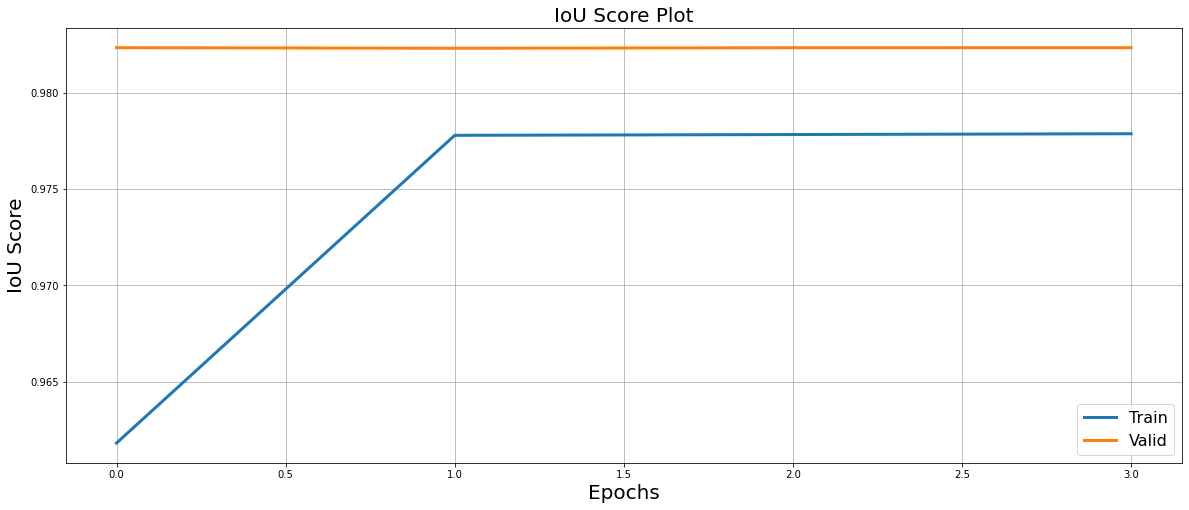

In [52]:
plt.figure(figsize=(20,8))
plt.plot(train_logs_df.index.tolist(), train_logs_df.iou_score.tolist(), lw=3, label = 'Train')
plt.plot(valid_logs_df.index.tolist(), valid_logs_df.iou_score.tolist(), lw=3, label = 'Valid')
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('IoU Score', fontsize=20)
plt.title('IoU Score Plot', fontsize=20)
plt.legend(loc='best', fontsize=16)
plt.grid()
plt.savefig('iou_score_plot.png')
plt.show()

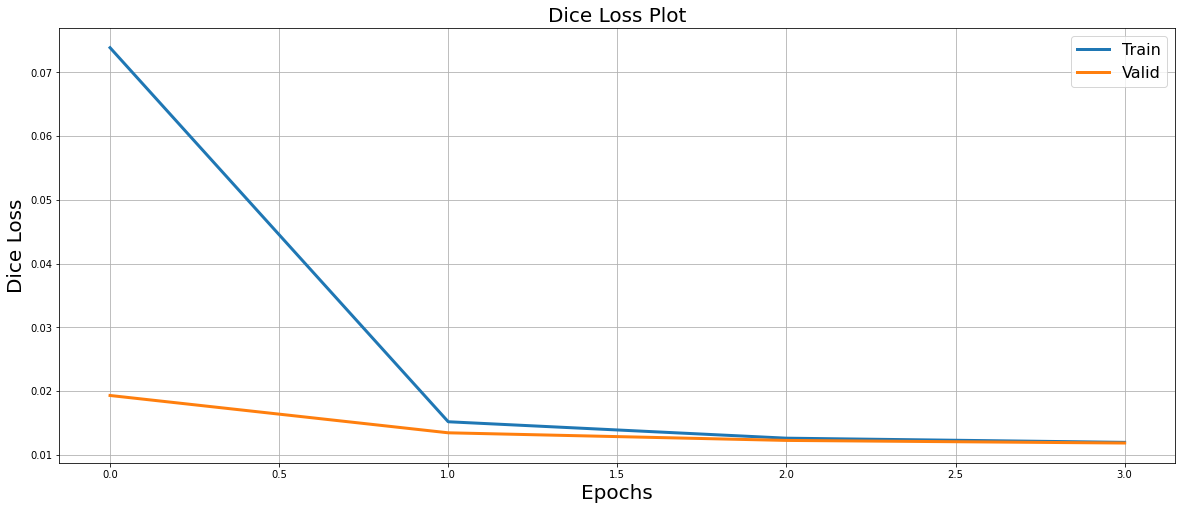

In [53]:
plt.figure(figsize=(20,8))
plt.plot(train_logs_df.index.tolist(), train_logs_df.dice_loss.tolist(), lw=3, label = 'Train')
plt.plot(valid_logs_df.index.tolist(), valid_logs_df.dice_loss.tolist(), lw=3, label = 'Valid')
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Dice Loss', fontsize=20)
plt.title('Dice Loss Plot', fontsize=20)
plt.legend(loc='best', fontsize=16)
plt.grid()
plt.savefig('dice_loss_plot.png')
plt.show()